#**Hands-on Activity 9.1 Data Visualization using Pandas and Matplotlib**

##**CPE311 - Computational Thinking with Python**

Name: Dela Cruz, Gabrielle

Section: CPE22S3

Performed on: 07/02/2024

Submitted on: 07/09/2024

Submitted to: Engr. Roman M. Richard

##**Instructions:**
- Create a Python notebook to answer all shown procedures, exercises and analysis in this section.

##**Resources:**
- Download the following datasets: earthquakes-1.csv, fb_stock_prices_2018.csv

##**Procedures:**
- 9.1 Introduction to Matplotlib:
https://colab.research.google.com/drive/1I234xOS7EzjBXicP5dcpAvQDh9c_Y36U?usp=sharing
- 9.2 Plotting with Pandas:
https://colab.research.google.com/drive/1I-qTrQwv5PBSy_vQ-K7U7Eygaiye6ueO?usp=sharing
- 9.3 Pandas Plotting Subpackage: https://colab.research.google.com/drive/1q9JUv7PT9RF5TueeJw2enh91qnNg446Q?usp=sharing

##**Data Analysis:**
- Provide comments on output from the procedures above.

##**Supplementary Activity:**
Using the CSV files provided and what we have learned so far in this module complete the following exercises:
1. Plot the rolling 20-day minimum of the Facebook closing price with the pandas plot() method.
2. Create a histogram and KDE of the change from open to close in the price of Facebook stock.
3. Using the earthquake data, create box plots for the magnitudes of each magType used in Indonesia.
4. Make a line plot of the difference between the weekly maximum high price and the weekly minimum low price for Facebook. This should be a single line.
5. Using matplotlib and pandas, create two subplots side-by-side showing the effect that after-hours trading has had on Facebook's stock price:
<ul type="none">
<li> • The first subplot will contain a line plot of the daily difference between that day's opening price and the prior day's closing price (be sure to review the Time series section of Aggregating Pandas DataFrames for an easy way to do this).
<li> • The second subplot will be a bar plot showing the net effect this had monthly, using resample().
<li> • Bonus #1: Color the bars according to whether they are gains in the stock price (green) or drops in the stock price (red).
<li> • Bonus #2: Modify the x-axis of the bar plot to show the threeletter abbreviation for the month.







In [1]:
# Code Setup. Succeeding code follows this setup in the visualization of datasets.
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

fb = pd.read_csv('/content/fb_stock_prices_2018(1).csv', index_col='date', parse_dates=True)
quakes = pd.read_csv('/content/earthquakes-1.csv')

<Axes: xlabel='date'>

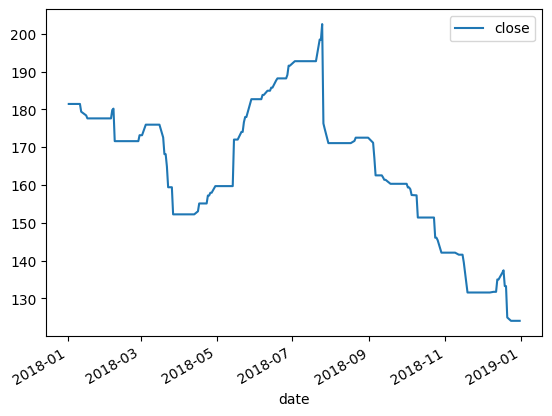

In [6]:
# Plot the rolling 20-day minimum of the Facebook closing price with the pandas plot() method.
fb.rolling('20D').agg({'close':'min'}).plot()

<Axes: ylabel='Density'>

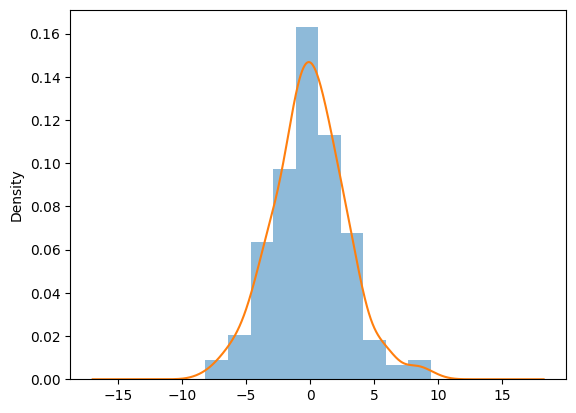

In [7]:
# Create a histogram and KDE of the change from open to close in the price of Facebook stock.
changeFB = fb.assign(change = lambda x : x.open-x.close)
ax = changeFB.change.plot(kind = 'hist', density = True, alpha = 0.5)
changeFB.change.plot(ax = ax, kind = 'kde')

mb            Axes(0.1,0.15;0.173913x0.75)
ms_20    Axes(0.308696,0.15;0.173913x0.75)
mwr      Axes(0.517391,0.15;0.173913x0.75)
mww      Axes(0.726087,0.15;0.173913x0.75)
dtype: object

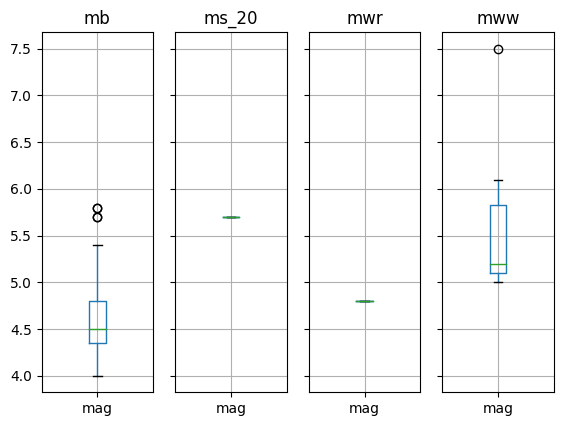

In [10]:
# Using the Earthquake data, create box plots for the magnitude of each magType used in Indonesia.
quakes.query('parsed_place == "Indonesia"').groupby('magType').boxplot(column = 'mag', layout = (1,4))

<Axes: xlabel='date'>

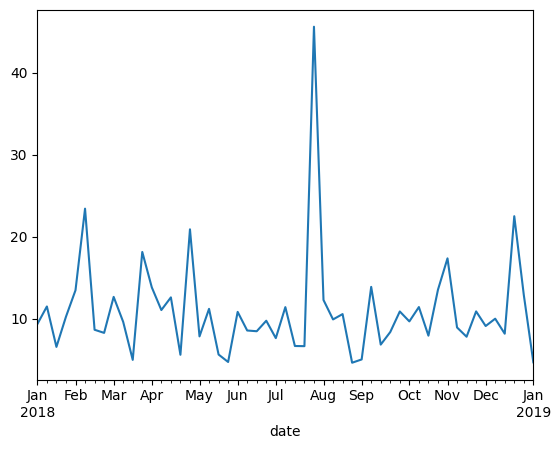

In [13]:
# Make a line plot of the difference between the weekly maximum high price and the weekly minimum low price for Facebook. This should be a single line.
weeklyMax = fb.high.resample('W').max()
weeklyMin = fb.low.resample('W').min()
difference = weeklyMax - weeklyMin
difference.plot()

[Text(0, 0, 'Jan'),
 Text(1, 0, 'Feb'),
 Text(2, 0, 'Mar'),
 Text(3, 0, 'Apr'),
 Text(4, 0, 'May'),
 Text(5, 0, 'Jun'),
 Text(6, 0, 'Jul'),
 Text(7, 0, 'Aug'),
 Text(8, 0, 'Sep'),
 Text(9, 0, 'Oct'),
 Text(10, 0, 'Nov'),
 Text(11, 0, 'Dec')]

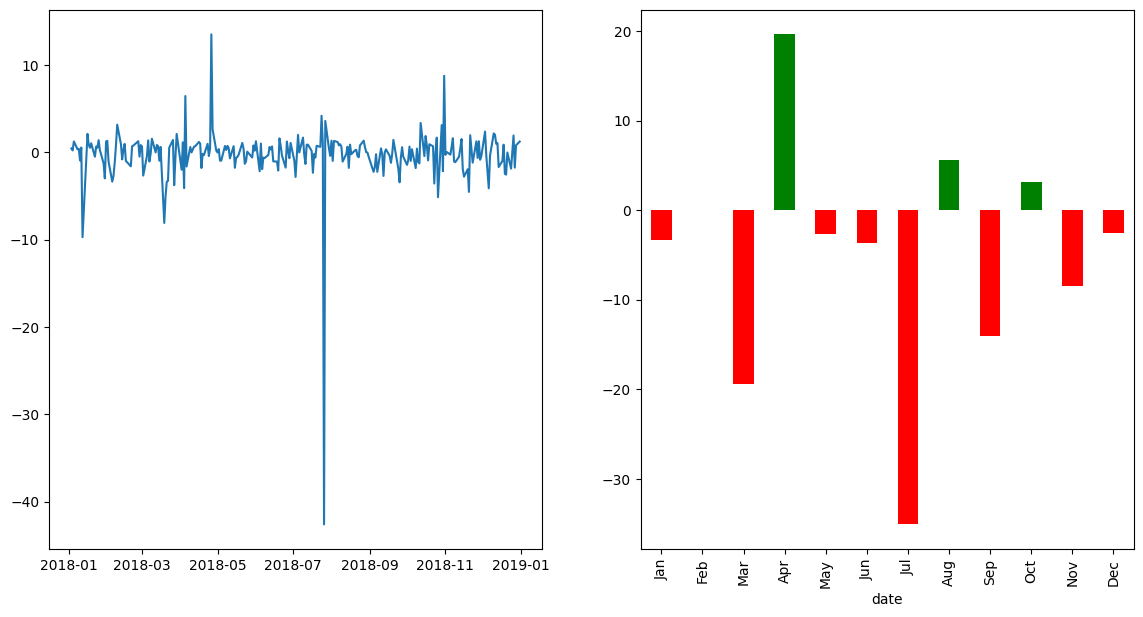

In [19]:
# Using matplotlib and pandas, create two subplots side-by-side showing the effect that after-hours trading has had on Facebook's stock price.
fb = fb.assign(beforeClose= lambda x: x.close.shift(), after=lambda x: x.open - x.beforeClose, change= lambda x: x.after.abs())

figure = plt.figure(figsize = (14,7))
grid = figure.add_gridspec(1,2)
left = figure.add_subplot(grid[0,0])
right = figure.add_subplot(grid[0,1])

left.plot(fb.index, fb.after)
showEffect = fb.after.resample('M').sum()

# Bonus 1 - Color the bars according to whether they are gains in the stock price (green) or drops in the stock price (red).
colors = ['red' if value < 0 else 'green' for value in showEffect]
showEffect.plot(kind = 'bar', ax = right, color = colors)

# Bonus 2 - Modify the x-axis of the bar plot to show the threeletter abbreviation for the month.
right.set_xticklabels(showEffect.index.strftime('%b'))

##**Summary/Conclusion:**
<p align="justify"> In this hands-on activity, data visualization of the given datasets were made using the libraries Pandas and Matplotlib in Python. Data Visualization is an important aspect in the aggregation and interpretation of data based on graphical findings that aid in lots of practical data science applications. After skimming through the procedures 9.1 through 9.3, I have applied the basics of utilizing both Pandas and Matplotlib that made me confidently able to plot and graph the dataframes of the datasets, along with the different types of available graphs along with their parameters. </p>